# Import Section

In [1]:
import numpy as np
from syncsweptsine import SyncSweep, LinearModel, FrfFilterKernel, HammersteinModel

## Import Virtual Sound Field

In [2]:
# SOUND_FIELD = lambda x: 2. * x.copy()

from pysndfx import AudioEffectsChain
SOUND_FIELD = AudioEffectsChain().reverb()

## import Warning Controller

In [3]:
from warnings import simplefilter
simplefilter('ignore')

## import Plotters

In [4]:
from matplotlib import pylab as plt
import seaborn as sns

sns.set()
sns.set_context('paper')
sns.set_palette('Set2', 4)

# Define Global Variables

## Sample rate [Hz]

In [5]:
RATE = 48000

## Total Time Length of Source [sec]

In [6]:
LEN_T = 180

## Freq of Source [Hz]

In [7]:
FREQ = 440

## Time-Axis

In [8]:
t = np.linspace(0, LEN_T, LEN_T*RATE, dtype=np.float64)

## About FIR-Filter

### Filter Length

In [9]:
LEN_FIR = 2048

## Make Source-Data

In [10]:
A = np.finfo(np.float64).max / 2.
wave = np.sin(2. * np.pi * FREQ * t) + .5 * np.sin(2. * np.pi * 3. * FREQ * t)
rawdata = A * wave / 1.5

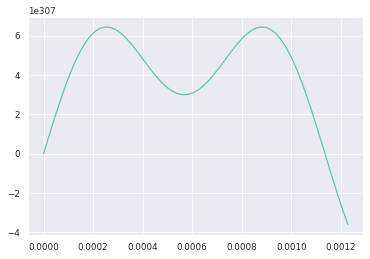

In [11]:
plt.plot(t[:60], rawdata[:60])
plt.show()

# Main

In [12]:
ssweep = SyncSweep(startfreq=10, stopfreq=RATE//2, durationappr=10, samplerate=RATE)
indata = np.array(ssweep, dtype=np.float64)
print(ssweep, indata.shape)

SyncSweep(
    startfreq=10,
    stopfreq=24000,
    duration=10.118191221236849,
    samplerate=48000)
 (485674,)


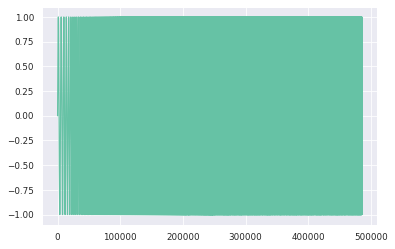

In [13]:
plt.plot(ssweep)
plt.show()

In [14]:
outdata = SOUND_FIELD(indata)
outdata.shape

(485674,)

In [15]:
# hhir = HigherHarmonicImpulseResponse.from_sweeps(syncsweep=ssweep, measuredsweep=outdata)
# hhir
model = HammersteinModel.from_sweeps(syncsweep=ssweep, measuredsweep=outdata, orders=[1,])

In [16]:
kernel = model.kernels[0]

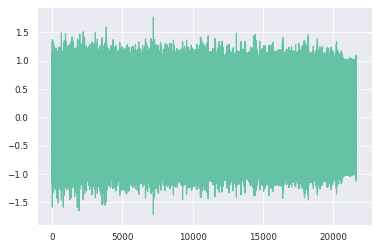

In [17]:
plt.plot(kernel.frf)
plt.show()

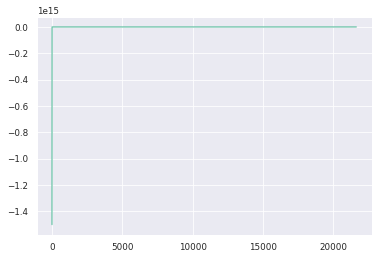

In [18]:
FRFinv = 1. / kernel.frf
plt.plot(FRFinv)
plt.show()

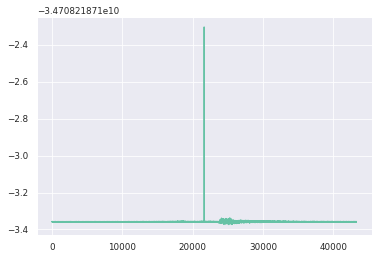

In [19]:
from scipy.fft import irfft
frf_inv = irfft(FRFinv)
plt.plot(frf_inv)
plt.show()

In [20]:
from scipy.signal import convolve

In [21]:
indata_modified = convolve(indata, frf_inv)

In [22]:
outdata_modified = SOUND_FIELD(indata_modified)

In [23]:
indata.shape, indata_modified.shape, outdata.shape, outdata_modified.shape

((485674,), (528925,), (485674,), (528925,))

# Plot

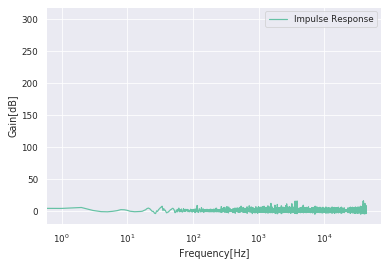

In [24]:
from scipy.fft import fft
plt.plot(20.*np.log10(np.abs(fft(frf_inv))), label='Impulse Response')
plt.xscale('log')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Gain[dB]')
plt.legend()
plt.show()

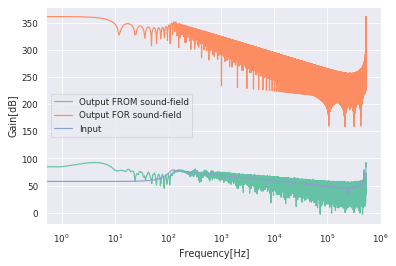

In [25]:
plt.plot(20.*np.log10(np.abs(fft(outdata_modified,))), label='Output FROM sound-field')
plt.plot(20.*np.log10(np.abs(fft(indata_modified,))), label='Output FOR sound-field')
plt.plot(20.*np.log10(np.abs(fft(indata,))), label='Input')
plt.xscale('log')
# plt.ylim([0, 100])
plt.xlabel('Frequency[Hz]')
plt.ylabel('Gain[dB]')
plt.legend()
plt.show()